In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from constants import *

In [2]:
X_train = np.load(PATH + "X_train.npy")
X_val = np.load(PATH + "X_val.npy")
y_train = np.load(PATH + "y_train.npy")
y_val = np.load(PATH + "y_val.npy")

# Exploration

In [ ]:
from exploration import *

In [8]:
samples_per_class = []

for i in range(NUM_OF_CLASSES):
    samples_per_class.append(X_train[np.argmax(y_train, axis=1) == i][:5])

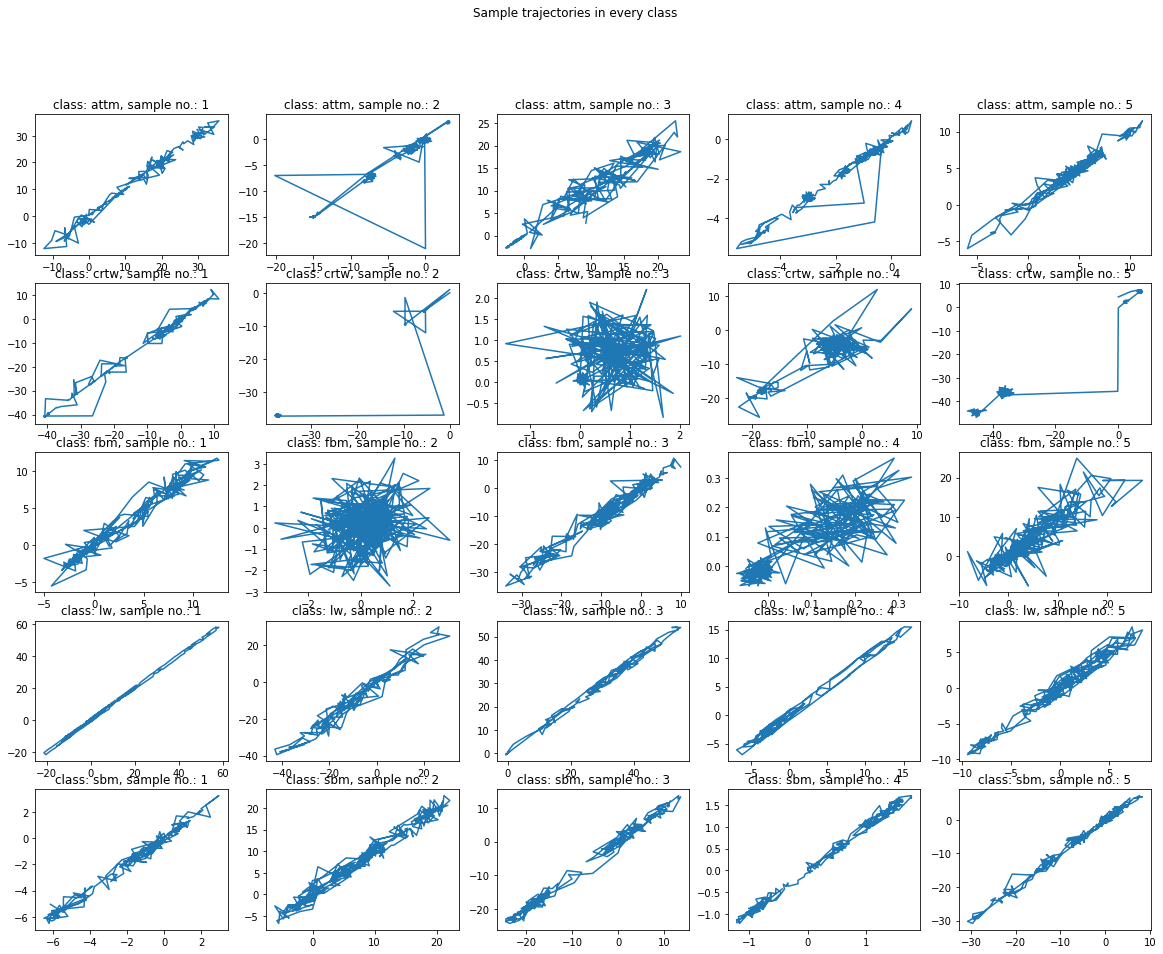

In [26]:
fig, axis = plt.subplots(5, 5, figsize=(20, 15))
fig.suptitle("Sample trajectories in every class")

for i, class_ in enumerate(samples_per_class):
    for j, sample in enumerate(class_):
        axis[i, j].plot(sample[:, 0], sample[:, 1])
        axis[i, j].set_title(f"class: {CLASSES[i]}, sample no.: {j+1}")

plt.show()

In [27]:
def calculate_distance(arr):
    distances = []
    for i in range(len(arr)-1):
        distances.append(np.linalg.norm(arr[i]-arr[i+1]))
    
    return distances


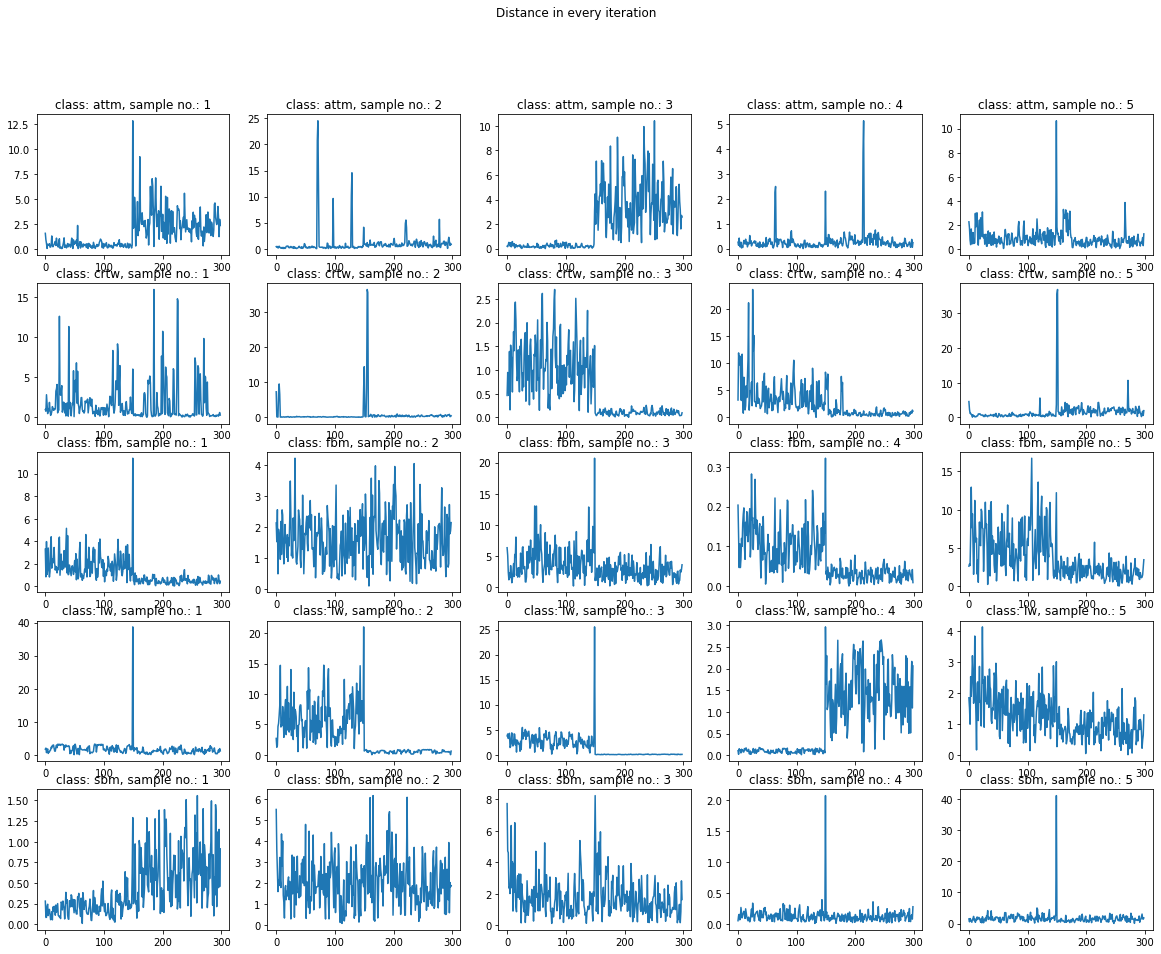

In [35]:
fig, axis = plt.subplots(5, 5, figsize=(20, 15))
fig.suptitle("Distance in every iteration")

for i, class_ in enumerate(samples_per_class):
    for j, sample in enumerate(class_):
        distance = calculate_distance(sample)
        axis[i, j].plot(distance)
        axis[i, j].set_title(f"class: {CLASSES[i]}, sample no.: {j+1}")

plt.show()

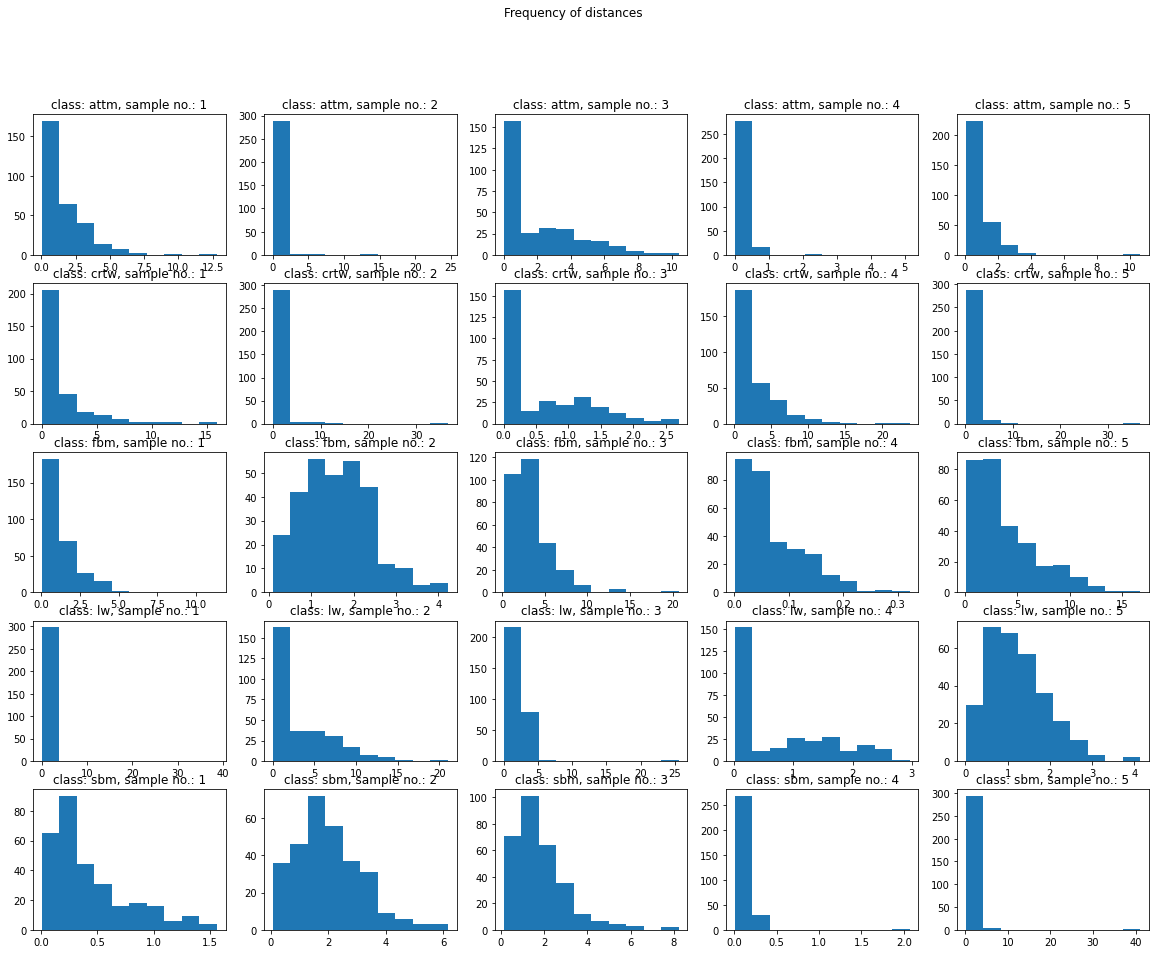

In [37]:
fig, axis = plt.subplots(5, 5, figsize=(20, 15))
fig.suptitle("Frequency of distances")

for i, class_ in enumerate(samples_per_class):
    for j, sample in enumerate(class_):
        distance = calculate_distance(sample)
        axis[i, j].hist(distance)
        axis[i, j].set_title(f"class: {CLASSES[i]}, sample no.: {j+1}")

plt.show()

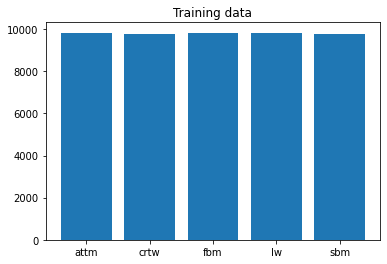

In [38]:
y_train_class_count = np.sum(y_train, axis=0)
plt.title("Training data")
plt.bar(CLASSES.values(), y_train_class_count)
plt.show()

# Preprocessing

## Looking for duplicates

In [43]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_train_flat.shape

(49000, 600)

## Data augmentation 

In [68]:
# TODO : look for nans and duplicates
# TODO : standarize or normalize data

### Rotating data

In [64]:
def rotate_data(X, thetas=[np.pi/2, np.pi, 3*np.pi/2]):
    X_rotated = []
    for theta in thetas:
        R = np.array([
            [np.cos(theta), np.sin(theta)],
            [-np.sin(theta), np.cos(theta)]
        ])
        X_rotated.append(X@R)

    return X_rotated

In [65]:
X_train_rotated = rotate_data(X_train)

In [66]:
X_train_augmented = np.concatenate([X_train, X_train_rotated[0], X_train_rotated[1], X_train_rotated[2]])